Name :- Heet Dhanuka

Batch :- B2

Roll No. :- 34

DL practical 7

---------

Aim :- Design and develop a LSTM model for stock price prediction.
Predict the opening price for Google Stock for next 15 days.
Experiment with split ratio = 75, time stamp value=50, number of LSTM layers = 4 and number of neurons in LSTM layer.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/Google_Stock_Price_Train.xlsx')

In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,2012-01-03 00:00:00,325.250000,332.830000,324.970000,663.590000,"73,80,500"
1,2012-01-04 00:00:00,331.270000,333.870000,329.080000,666.450000,"57,49,400"
2,2012-01-05 00:00:00,329.830000,330.750000,326.890000,657.210000,"65,90,300"
3,2012-01-06 00:00:00,328.340000,328.770000,323.680000,648.240000,"54,05,900"
4,2012-01-09 00:00:00,322.040000,322.290000,309.460000,620.760000,"1,16,88,800"
...,...,...,...,...,...,...
1504,22/12/2017,1061.109985,1064.199951,1059.439941,1060.119995,755100
1505,26/12/2017,1058.069946,1060.119995,1050.199951,1056.739990,760600
1506,27/12/2017,1057.390015,1058.369995,1048.050049,1049.369995,1271900
1507,28/12/2017,1051.599976,1054.750000,1044.770020,1048.140015,837100


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - loss: 0.0311 - val_loss: 0.0017
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0014 - val_loss: 0.0045
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - loss: 9.6420e-04 - val_loss: 0.0029
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 9.8458e-04 - val_loss: 0.0054
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 9.7072e-04 - val_loss: 0.0023
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 9.1246e-04 - val_loss: 0.0048
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 7.9058e-04 - val_loss: 0.0028
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - loss: 7.7770e-04 - val_loss: 0.0053
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 7.5491e-04 - val_loss: 0.0032
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 6.1465e-04 - val_loss: 0.0012
Epoch 12/100
34/34 ━━

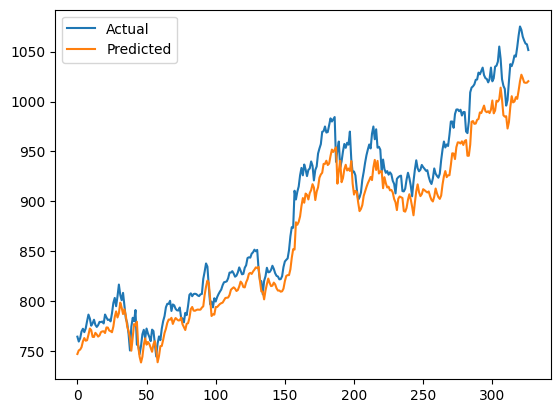

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the  data
df = pd.read_excel('/content/Google_Stock_Price_Train.xlsx', index_col='Date')

# Extract the opening price
data = df['Open'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size, :], data[train_size:len(data), :]

# Function to create dataset with a given time stamp
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Time stamp
look_back = 50

X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))  # Layer 1
model.add(LSTM(50, return_sequences=True))  # Layer 2
model.add(LSTM(50, return_sequences=True))  # Layer 3
model.add(LSTM(50))  # Layer 4
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), callbacks=[early_stop])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to get the original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Predict the opening price for the next 15 days
last_data = data[-look_back:]
for i in range(15):
    x_input = np.reshape(last_data, (1, look_back, 1))
    predicted_price = model.predict(x_input)
    predicted_price = scaler.inverse_transform(predicted_price)
    print("Predicted opening price for day", i + 1, ":", predicted_price[0][0])
    last_data = np.append(last_data, predicted_price)
    last_data = last_data[1:]

# Plot the training and testing predictions
plt.plot(Y_test[0], label='Actual')
plt.plot(test_predict, label='Predicted')
plt.legend()
plt.show()
